In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from src.tools.plotter import init_plots, store_sns

init_plots()

In [80]:
file_name = f"results_false_positives.csv"

df = pd.read_csv(file_name, sep=";")
gdf = df.groupby(df.method)

DLLA_PALETTE = sns.light_palette(sns.color_palette()[0], n_colors=5)
TVLA_PALETTE = sns.light_palette(sns.color_palette()[1], n_colors=5)

THRESHOLD_COLOR = "#FF000080"
EXPERIMENTS = "50.000"

In [70]:
TITLE_LOOKUP = {
    "dlla_open": "DL-LA 9 class",
    "dlla_wegener": "DL-LA Wegener",
    "tvla_rho": "TVLA $\\rho$-test",
    "tvla_t_1": "TVLA $t$-test, $\mu_1$",
    "tvla_t_2": "TVLA $t$-test, $\mu_2$",
    "tvla_t_3": "TVLA $t$-test, $\mu_3$",
}

TITLE_LOOKUP_BAR = {
    "dlla_open": "DL-LA\n9 class",
    "dlla_wegener": "DL-LA\nWegener",
    "tvla_rho": "TVLA\n$\\rho$-test",
    "tvla_t_1": "TVLA\n$t$-test, $\mu_1$",
    "tvla_t_2": "TVLA\n$t$-test, $\mu_2$",
    "tvla_t_3": "TVLA\n$t$-test, $\mu_3$",
}

COLOR_LOOKUP = {
    "dlla_open": DLLA_PALETTE[1],
    "dlla_wegener": DLLA_PALETTE[3],
    "tvla_rho": TVLA_PALETTE[1],
    "tvla_t_1": TVLA_PALETTE[2],
    "tvla_t_2": TVLA_PALETTE[3],
    "tvla_t_3": TVLA_PALETTE[4],
}

def title(arr):
    return [TITLE_LOOKUP_BAR[m] for m in arr]

def palette(arr):
    return [COLOR_LOOKUP[m] for m in arr]

In [62]:
methods = np.unique(df.method)

fpr_alpha = dict([(TITLE_LOOKUP[m], []) for m in methods])
fpr, color = [], []
alphas = 10 ** -np.arange(0, 4, .05, dtype=float)
for method in methods:
    for alpha in alphas:
        num_fp = np.sum(np.array(gdf.get_group(method).p < alpha))
        total = len(gdf.get_group(method).p)
        fpr_alpha[TITLE_LOOKUP[method]].append(num_fp / total)

    num_fp = np.sum(np.array(gdf.get_group(method).p < .01))
    total = len(gdf.get_group(method).p)
    fpr.append(num_fp / total)
    color.append(COLOR_LOOKUP[method])

df_fpr = pd.DataFrame(fpr_alpha)

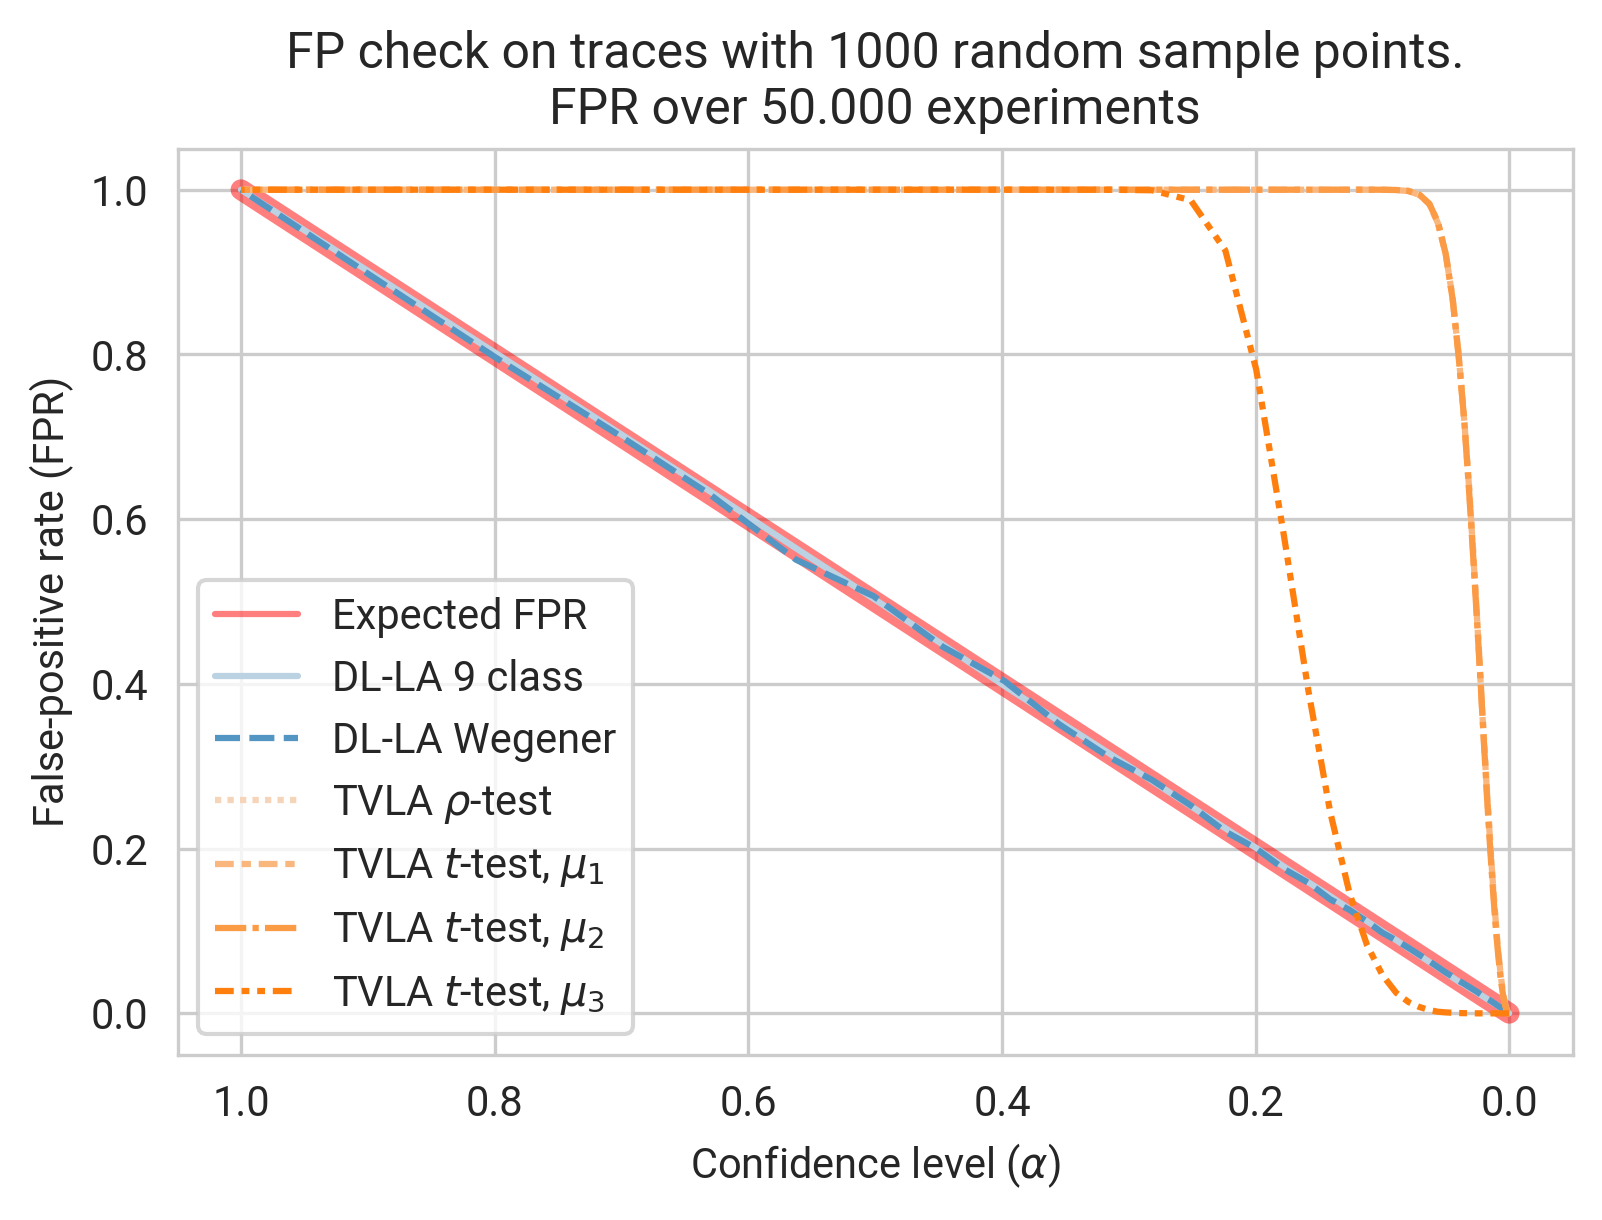

In [108]:
G = sns.lineplot()
sns.lineplot(data=pd.DataFrame({"Expected FPR": alphas}).set_index(alphas), palette=["#FF000080"], linewidth="5")
sns.lineplot(data=df_fpr.set_index(alphas), palette=palette(methods))
G.set(title=f"FP check on traces with 1000 random sample points.\nFPR over {EXPERIMENTS} experiments", xlabel="Confidence level ($\\alpha$)", ylabel="False-positive rate (FPR)")
G.invert_xaxis()
store_sns(G, "fp-check-graph")

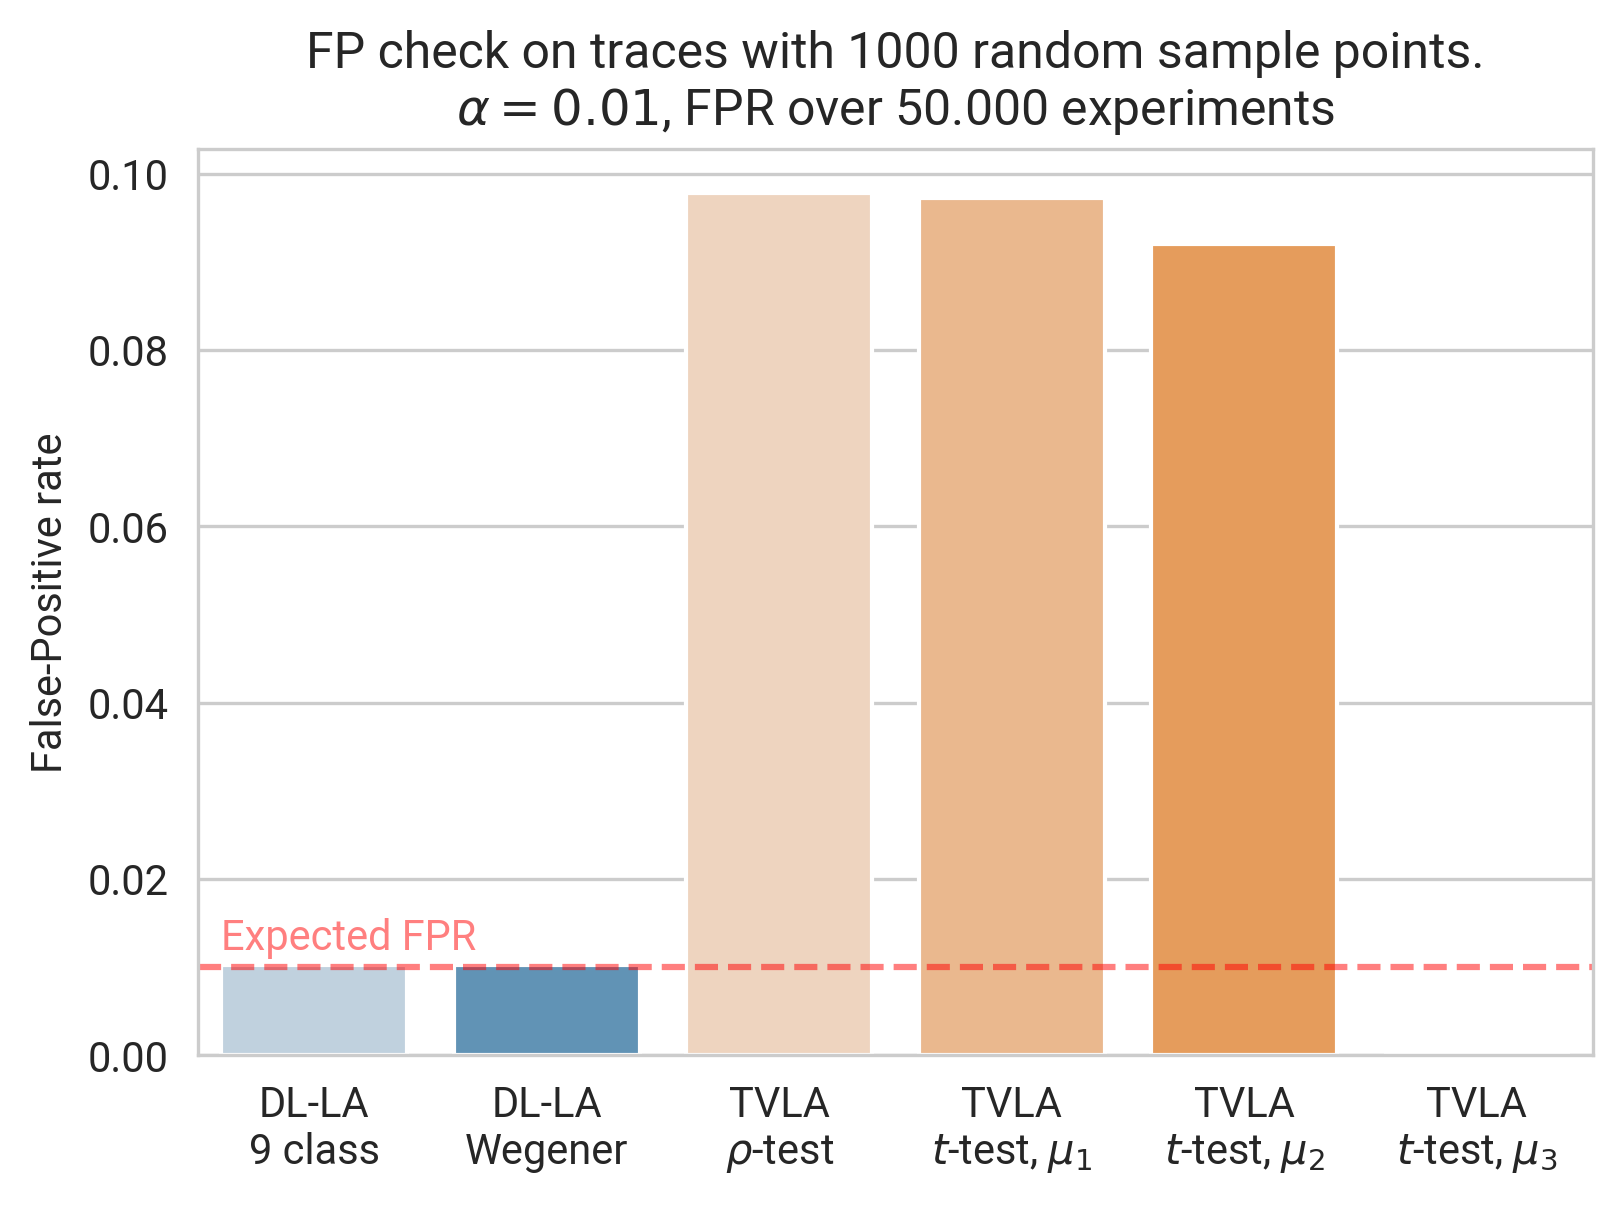

In [109]:
G = sns.barplot(x="method", y="fpr", data={"method": title(methods), "fpr": fpr},
            palette=palette(methods))
G.set(title=f"FP check on traces with 1000 random sample points.\n$\\alpha = 0.01$, FPR over {EXPERIMENTS} experiments", ylabel="False-Positive rate" )
G.axhline(.01, color=THRESHOLD_COLOR, linestyle="--")
G.text(-.4, .012, "Expected FPR", color=THRESHOLD_COLOR)

store_sns(G, "fp-check")